In [17]:
             #PARTE 01: 
"""Importar bibliotecas iniciais para a manipulação inicial dos dados"""
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('rideshare_kaggle.csv') #Leitura dos dados 
df = df.drop(columns=['timezone','datetime','id','latitude','longitude','product_id']) #Exclusão das colunas desnecessárias 
df.head() 
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 51 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   timestamp                    693071 non-null  float64
 1   hour                         693071 non-null  int64  
 2   day                          693071 non-null  int64  
 3   month                        693071 non-null  int64  
 4   source                       693071 non-null  object 
 5   destination                  693071 non-null  object 
 6   cab_type                     693071 non-null  object 
 7   name                         693071 non-null  object 
 8   price                        637976 non-null  float64
 9   distance                     693071 non-null  float64
 10  surge_multiplier             693071 non-null  float64
 11  temperature                  693071 non-null  float64
 12  apparentTemperature          693071 non-null  float64
 13 

,timestamp,hour,day,month,price,distance,surge_multiplier,temperature,apparentTemperature,precipIntensity,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
count,6.930710e+05,693071.000000,693071.000000,693071.000000,637976.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,...,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05
mean,1.544046e+09,11.619137,17.794365,11.586684,16.545125,2.189430,1.013870,39.584388,35.881222,0.008922,...,0.037374,1.544044e+09,33.457774,1.544042e+09,45.261313,1.544047e+09,29.731002,1.544048e+09,41.997343,1.544048e+09
std,6.891925e+05,6.948114,9.982286,0.492429,9.324359,1.138937,0.091641,6.726084,7.918707,0.026901,...,0.055214,6.912028e+05,6.467224,6.901954e+05,5.645046,6.901353e+05,7.110494,6.871862e+05,6.936841,6.910777e+05
min,1.543204e+09,0.000000,1.000000,11.000000,2.500000,0.020000,1.000000,18.910000,12.130000,0.000000,...,0.000000,1.543162e+09,15.630000,1.543122e+09,33.510000,1.543154e+09,11.810000,1.543136e+09,28.950000,1.543187e+09
25%,1.543444e+09,6.000000,13.000000,11.000000,9.000000,1.280000,1.000000,36.450000,31.910000,0.000000,...,0.000000,1.543421e+09,30.170000,1.543399e+09,42.570000,1.543439e+09,27.760000,1.543399e+09,36.570000,1.543439e+09
50%,1.543737e+09,12.000000,17.000000,12.000000,13.500000,2.160000,1.000000,40.490000,35.900000,0.000000,...,0.000400,1.543770e+09,34.240000,1.543727e+09,44.680000,1.543788e+09,30.130000,1.543745e+09,40.950000,1.543788e+09
75%,1.544828e+09,18.000000,28.000000,12.000000,22.500000,2.920000,1.000000,43.580000,40.080000,0.000000,...,0.091600,1.544807e+09,38.880000,1.544789e+09,46.910000,1.544814e+09,35.710000,1.544789e+09,44.120000,1.544818e+09
max,1.545161e+09,23.000000,30.000000,12.000000,97.500000,7.860000,3.000000,57.220000,57.220000,0.144700,...,0.145900,1.545152e+09,43.100000,1.545192e+09,57.870000,1.545109e+09,40.050000,1.545134e+09,57.200000,1.545109e+09


'Considerações iniciais: \n- Falta de dados em price\n- Após plotar preço e distância é possível ver uma corelação, no entanto é perceptível a influencia de outras variáveis\n- Houve corrida de 20 metros [Vmín]\n- Temperaturas bem altas, inclusive algumas acima de 57 graus\n- Para o cloudCover houve acumulo de dados no último dia\n- #Pouco índice de Sol e temperaturas elevadas, \nleva crer que é uma cidade grande com nuvens de poluição ou falta dados. Dados acumulados no primeiro dia\n- Como não faltam dados, concluo que é uma cidade poluída, pois apresenta valores elevados de temperatura e \nbaixos níveis de UV.'

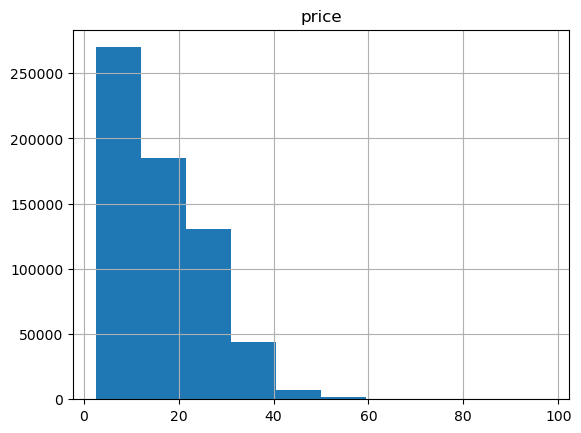

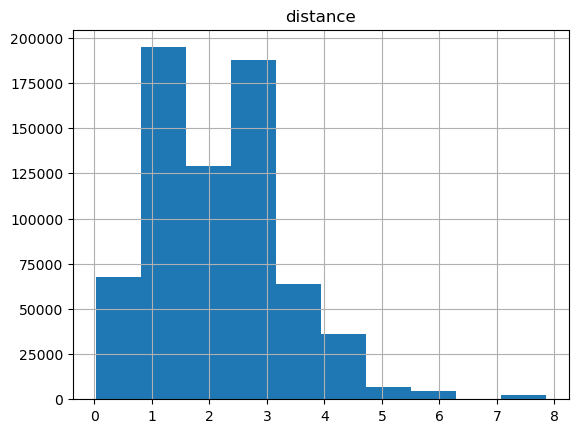

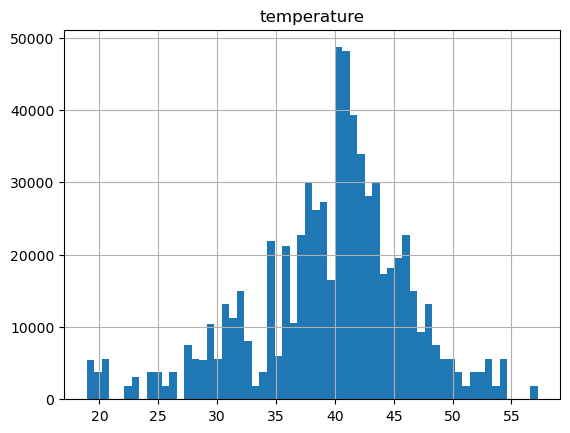

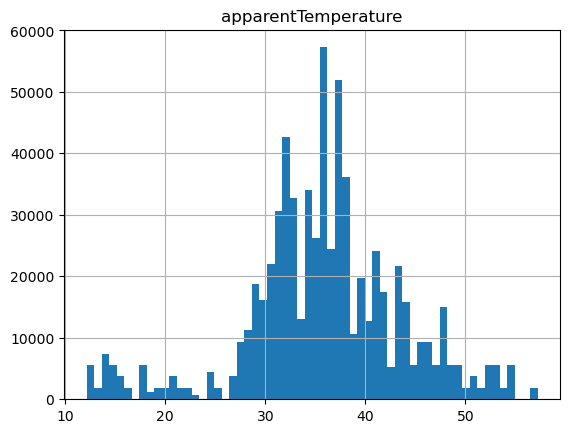

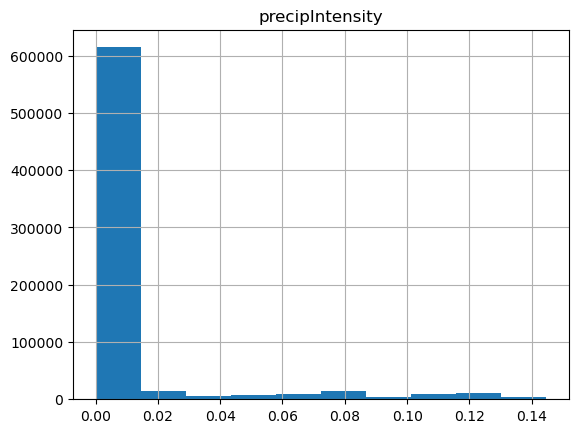

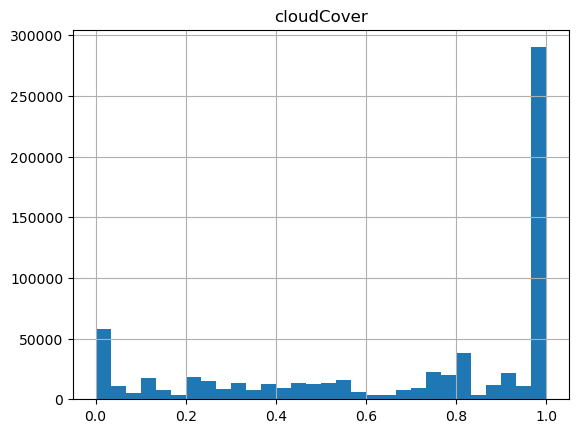

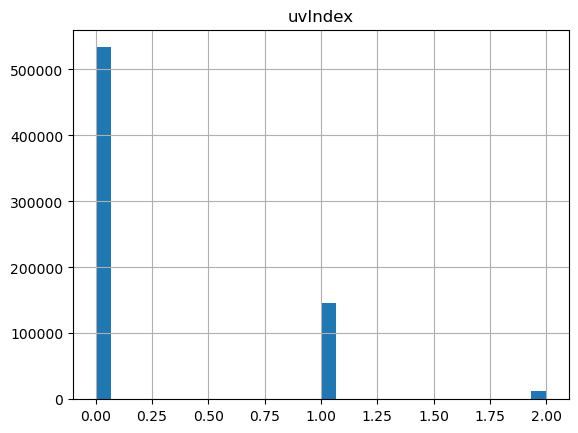

In [18]:
                                                #PARTE 02:
    
#DISTRIBUIÇÃO VARIÁVEIS NUMÉRICAS: Optei por plotar separadamente para melhor visualização (figsize não ajudou).
df.hist('price')
df['price'].describe() 
df.hist('distance') 
df['distance'].describe() 
df.hist('temperature', bins=60) 
df['temperature'].describe()
df.hist('apparentTemperature', bins=60) 
df['apparentTemperature'].describe()
df.hist('precipIntensity') 
df['precipIntensity'].describe()
df['cloudCover'].describe()
df.hist('cloudCover', bins = 30) 
df.hist('uvIndex', bins=30) 
df['uvIndex'].describe() #Como não faltam dados, concluo que é uma cidade poluída, pois apresenta valores elevados de temperatura e baixos níveis de UV.

"""Considerações iniciais: 
- Falta de dados em price
- Após plotar preço e distância é possível ver uma corelação, no entanto é perceptível a influencia de outras variáveis
- Houve corrida de 20 metros [Vmín]
- Temperaturas bem altas, inclusive algumas acima de 57 graus
- Para o cloudCover houve acumulo de dados no último dia
- #Pouco índice de Sol e temperaturas elevadas, 
leva crer que é uma cidade grande com nuvens de poluição ou falta dados. Dados acumulados no primeiro dia
- Como não faltam dados, concluo que é uma cidade poluída, pois apresenta valores elevados de temperatura e 
baixos níveis de UV."""

In [19]:
#DISTRIBUIÇÃO VARIÁVEIS CATEGORICAS:
df['month'].describe() 
df['day'].describe() 
df['hour'].describe() 
df['surge_multiplier'].describe() 
"""-Apenas dados do mês de novembro e alguns dias de dezembro
-Não há dados entre os dias 5 e 10 e 19 e 26 """

'-Apenas dados do mês de novembro e alguns dias de dezembro\n-Não há dados entre os dias 5 e 10 e 19 e 26 '

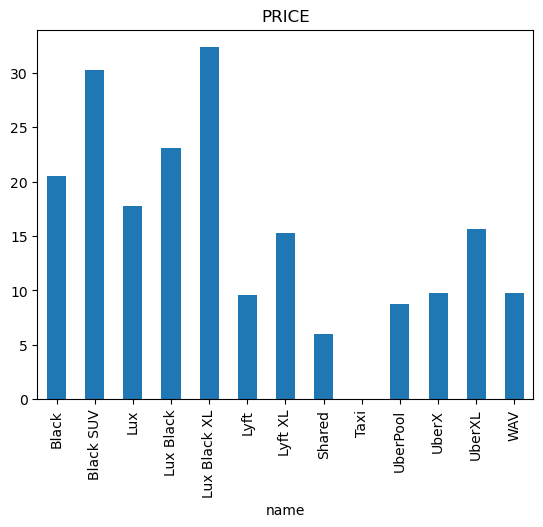

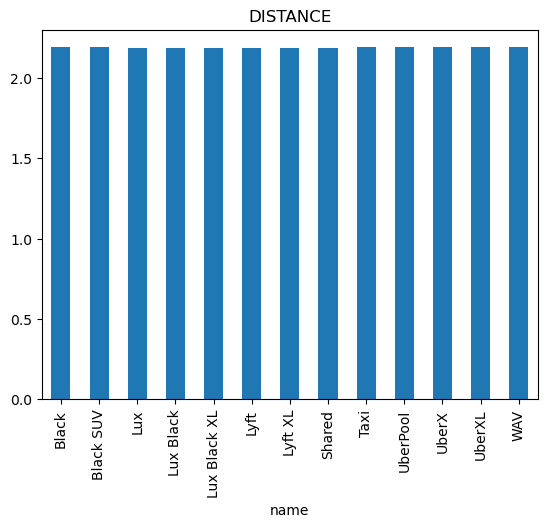

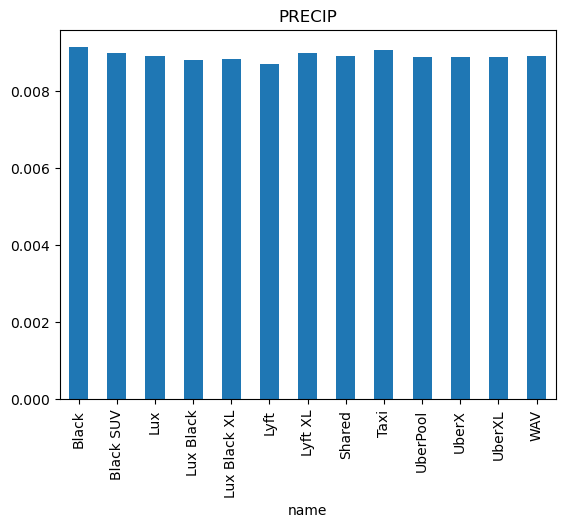

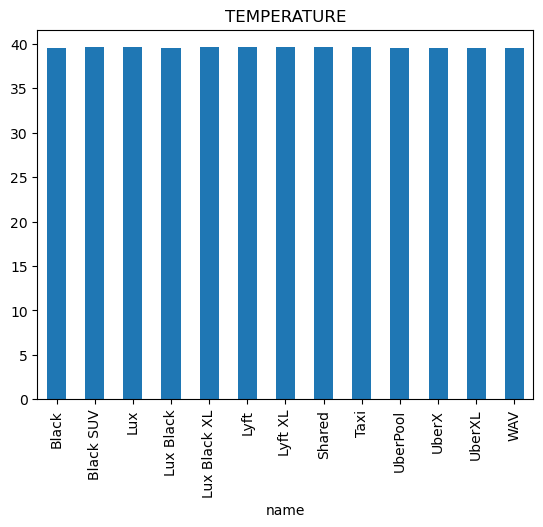

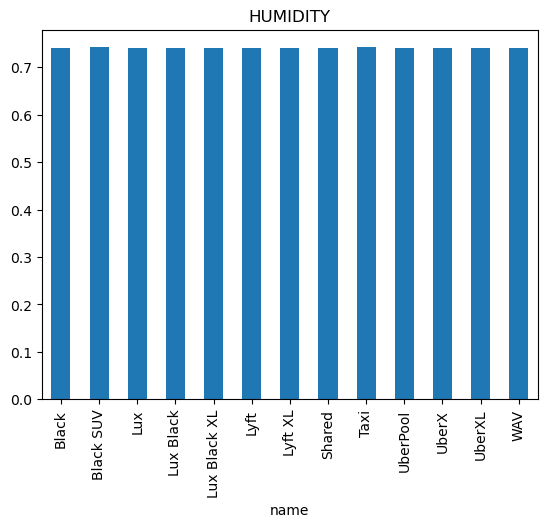

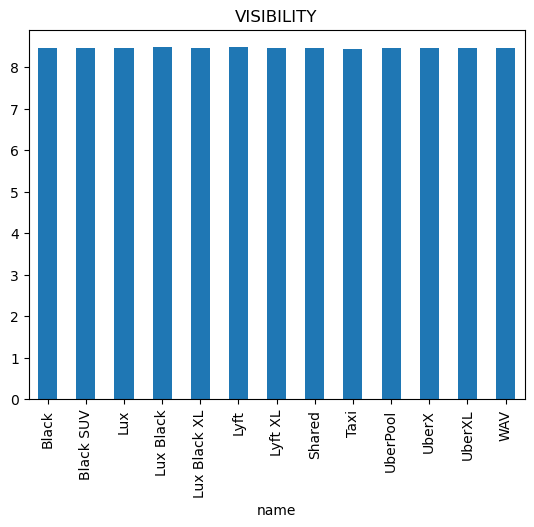

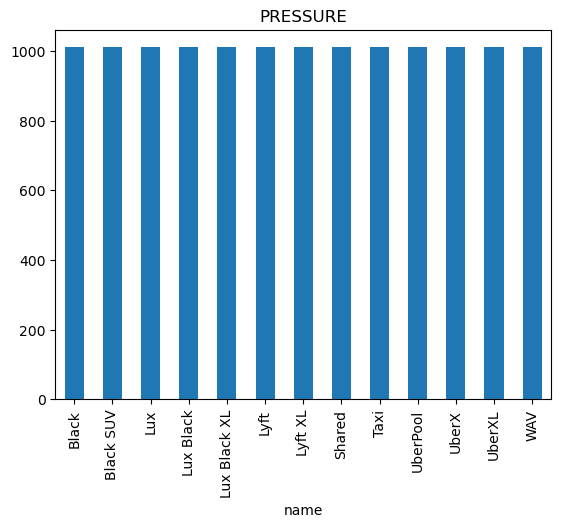

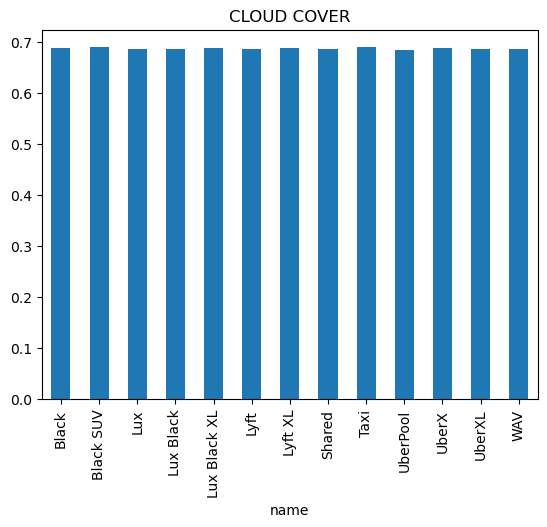

'FOI POSSÍVEL PERCEBER QUE AS CORRIDAS DE TODOS OS ATRIBUTOS "NAME" ESTAVAM SOB AS MESMAS CONDIÇÕES E DISTÂNCIAS MÉDIAS.\nNO ENTANTO, OS PREÇOS PARA CADA ATRIBUTO MOSTROU GRANDE VARIAÇÃO, CONCLUI-SE PORTANTO QUE DEPENDENDO DO "NAME" PODE HAVER\nDIFERENÇA NO PREÇO'

In [20]:
df_price = df.groupby('name')['price'].mean()
df_price.plot(kind='bar', title = 'PRICE')
plt.show()

df_price = df.groupby('name')['distance'].mean()
df_price.plot(kind='bar', title = 'DISTANCE')
plt.show()

df_price = df.groupby('name')['precipIntensity'].mean()
df_price.plot(kind='bar', title = 'PRECIP')
plt.show()

df_price = df.groupby('name')['temperature'].mean()
df_price.plot(kind='bar', title = 'TEMPERATURE')
plt.show()

df_price = df.groupby('name')['humidity'].mean()
df_price.plot(kind='bar', title = 'HUMIDITY')
plt.show()

df_price = df.groupby('name')['visibility'].mean()
df_price.plot(kind='bar', title = 'VISIBILITY')
plt.show()

df_price = df.groupby('name')['pressure'].mean()
df_price.plot(kind='bar', title = 'PRESSURE')
plt.show()

df_price = df.groupby('name')['cloudCover'].mean()
df_price.plot(kind='bar', title = 'CLOUD COVER')
plt.show()

"""FOI POSSÍVEL PERCEBER QUE AS CORRIDAS DE TODOS OS ATRIBUTOS "NAME" ESTAVAM SOB AS MESMAS CONDIÇÕES E DISTÂNCIAS MÉDIAS.
NO ENTANTO, OS PREÇOS PARA CADA ATRIBUTO MOSTROU GRANDE VARIAÇÃO, CONCLUI-SE PORTANTO QUE DEPENDENDO DO "NAME" PODE HAVER
DIFERENÇA NO PREÇO"""

In [21]:

#Cálculo da média:
mean_price = df['price'].mean()

# Substituição dos valores NaN pela média de price:
df['price'].fillna(mean_price, inplace=True)
df['price']



0          5.000000
1         11.000000
2          7.000000
3         26.000000
4          9.000000
            ...    
693066    13.000000
693067     9.500000
693068    16.545125
693069    27.000000
693070    10.000000
Name: price, Length: 693071, dtype: float64

In [22]:
                                            #PARTE 03:
df2 = df.copy()
df2.dropna()
df.shape
df2.shape
#Nenhuma linha com NA. A partir disso concluo que não há dados faltantes a não ser para price

(693071, 51)

In [23]:
#Cálculo da média:
mean_price = df['price'].mean()

# Substituição dos valores NaN pela média de price:
df['price'].fillna(mean_price, inplace=True)
df['price']


0          5.000000
1         11.000000
2          7.000000
3         26.000000
4          9.000000
            ...    
693066    13.000000
693067     9.500000
693068    16.545125
693069    27.000000
693070    10.000000
Name: price, Length: 693071, dtype: float64

In [24]:
df2 = df2.drop_duplicates()
df2.shape
#1660 linhas duplicadas foram excluídas.
df2

,timestamp,hour,day,month,source,destination,cab_type,name,price,distance,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,1.544953e+09,9,16,12,Haymarket Square,North Station,Lyft,Shared,5.000000,0.44,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,1.543284e+09,2,27,11,Haymarket Square,North Station,Lyft,Lux,11.000000,0.44,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,1.543367e+09,1,28,11,Haymarket Square,North Station,Lyft,Lyft,7.000000,0.44,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,1.543554e+09,4,30,11,Haymarket Square,North Station,Lyft,Lux Black XL,26.000000,0.44,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,1.543463e+09,3,29,11,Haymarket Square,North Station,Lyft,Lyft XL,9.000000,0.44,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693066,1.543708e+09,23,1,12,West End,North End,Uber,UberXL,13.000000,1.00,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693067,1.543708e+09,23,1,12,West End,North End,Uber,UberX,9.500000,1.00,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693068,1.543708e+09,23,1,12,West End,North End,Uber,Taxi,16.545125,1.00,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693069,1.543708e+09,23,1,12,West End,North End,Uber,Black SUV,27.000000,1.00,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800


In [25]:
                        #FUNÇÃO PARA REDUZIR AS AMOSTRAS: SUGESTÃO
# parâmetros
num_instancias_por_classe = 3000
# cria datasets auxiliares para reduzir o dataset para o tamanho desejado
df_temp = []
for classe in df['name'].unique():
# seleciona parcela do dataset da classe desejada
    temp = df[df['name'] == classe].sample(n=num_instancias_por_classe, random_state=42)
    # salva para concatenar no final
    df_temp.append(temp)
# concatena todos as subparcelas no dataset com tamanho desejado
df3 = pd.concat(df_temp, axis=0)
# confirma a divisão correta por classe
print('-'*30)
print('#instâncias em relação a coluna name')
print(df3['name'].value_counts())
print('-'*30)
# mostra o dataseT
df3

------------------------------
#instâncias em relação a coluna name
Shared          3000
Lux             3000
Lyft            3000
Lux Black XL    3000
Lyft XL         3000
Lux Black       3000
UberXL          3000
Black           3000
UberX           3000
WAV             3000
Black SUV       3000
UberPool        3000
Taxi            3000
Name: name, dtype: int64
------------------------------


,timestamp,hour,day,month,source,destination,cab_type,name,price,distance,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
687904,1.543502e+09,14,29,11,North Station,Fenway,Lyft,Shared,7.000000,3.17,...,0.0000,1543510800,35.20,1543550400,44.96,1543510800,31.40,1543550400,38.85,1543510800
190253,1.543613e+09,21,30,11,Boston University,North Station,Lyft,Shared,7.000000,3.54,...,0.0003,1543593600,28.79,1543579200,42.52,1543600800,26.41,1543575600,40.53,1543611600
596995,1.543459e+09,2,29,11,Beacon Hill,South Station,Lyft,Shared,5.000000,2.47,...,0.0000,1543420800,33.60,1543399200,42.70,1543438800,30.08,1543399200,36.77,1543438800
386098,1.543438e+09,20,28,11,Theatre District,Haymarket Square,Lyft,Shared,5.000000,1.72,...,0.0000,1543420800,33.70,1543399200,42.57,1543438800,29.94,1543399200,36.55,1543438800
532729,1.545144e+09,14,18,12,Fenway,Back Bay,Lyft,Shared,3.000000,1.45,...,0.0029,1545152400,23.05,1545192000,37.96,1545109200,11.83,1545134400,31.85,1545109200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94768,1.543539e+09,0,30,11,Back Bay,Northeastern University,Uber,Taxi,16.545125,1.08,...,0.0000,1543510800,34.84,1543550400,45.12,1543510800,30.80,1543550400,39.02,1543510800
164204,1.544822e+09,21,14,12,Beacon Hill,South Station,Uber,Taxi,16.545125,2.48,...,0.0000,1544806800,26.76,1544788800,46.90,1544814000,27.41,1544788800,44.15,1544817600
614565,1.543493e+09,12,29,11,South Station,Beacon Hill,Uber,Taxi,16.545125,2.50,...,0.0000,1543510800,35.07,1543550400,44.68,1543510800,30.92,1543550400,38.34,1543510800
584994,1.543300e+09,6,27,11,Northeastern University,Theatre District,Uber,Taxi,16.545125,1.94,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000


In [26]:
from sklearn.model_selection import train_test_split
#divisão treinamento e teste 50/50
X_train, X_test, y_train, y_test = train_test_split(df3, df3['price'], test_size= 0.33333, stratify = df3['name'], random_state = 42)
#divisão treinamento e validação 50/50
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.5, stratify = X_train['name'], random_state = 42)

print("Treinamento:", X_train.shape)
print("Validação:", X_val.shape)
print("Teste:", X_test.shape)

Treinamento: (13000, 51)
Validação: (13000, 51)
Teste: (13000, 51)


In [27]:
                                #PARTE 04:
 
X_train_corr = X_train.corr()
X_train_alta_corr = X_train_corr.mask(X_train_corr<0.01, np.nan) #Exclusão dos valores para facilitar a visualização
X_train_alta_corr['price']
"""Percebe-se que as variáveis numéricas mais correlacionadas são: DISTANCE, SURGE_MULTIPLIER
WINDSPEED, WINDGUST E OZONE."""

'Percebe-se que as variáveis numéricas mais correlacionadas são: DISTANCE, SURGE_MULTIPLIER\nWINDSPEED, WINDGUST E OZONE.'

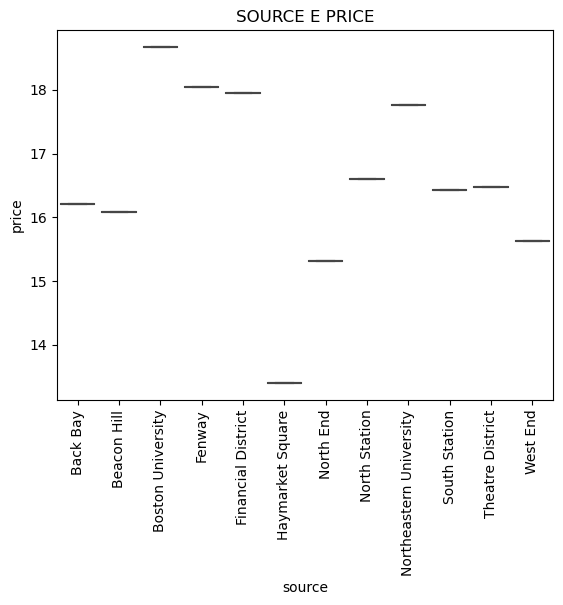

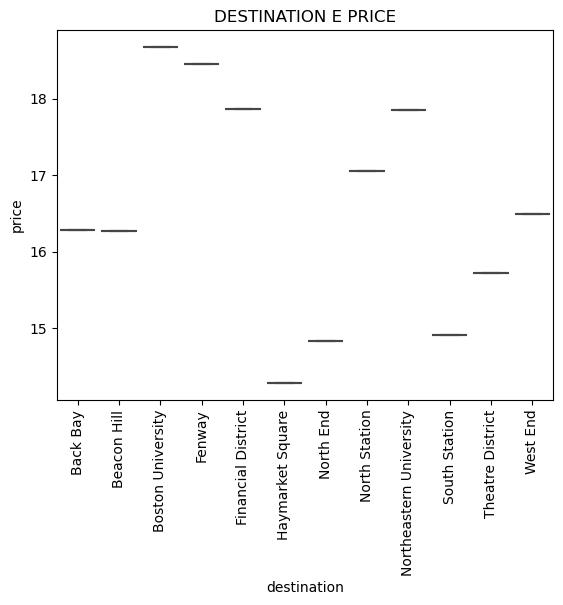

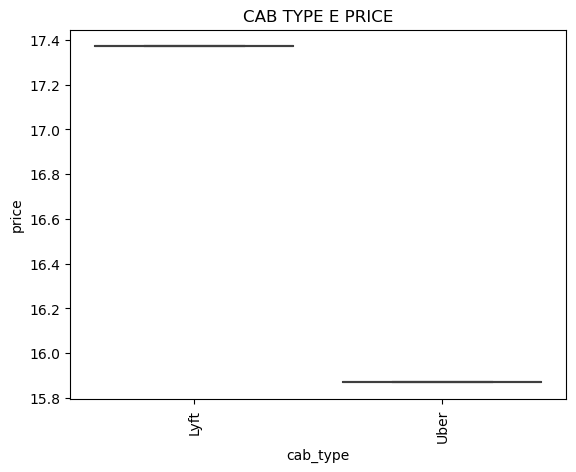

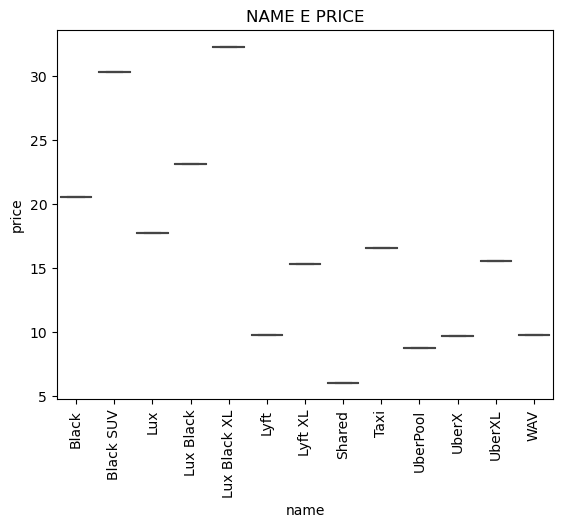

In [28]:
import seaborn as sns
    #SOURCE E PRICE
source_price = X_train.groupby('source')['price'].mean().reset_index() #Agrupar pelas duas colunas que eu busco
sns.boxplot(x='source', y='price', data=source_price)
plt.title('SOURCE E PRICE')
plt.xticks(rotation=90)
plt.show()
"""Haymarket Square possui a menor média de preços enquanto Boston University possui a maior. A partir disso é possível que
Levando em consideração a fonte do pedido da corrida, conclui-se que Haymarket Square é próxima dos locais de destino,
enquanto Boston University é mais afastado."""

            #DESTINATION 
dest_price = X_train.groupby('destination')['price'].mean().reset_index() 
sns.boxplot(x='destination', y='price', data=dest_price)
plt.title('DESTINATION E PRICE')
plt.xticks(rotation=90)
plt.show()

            #CAB_TYPE
type_price = X_train.groupby('cab_type')['price'].mean().reset_index() 
sns.boxplot(x='cab_type', y='price', data=type_price)
plt.title('CAB TYPE E PRICE')
plt.xticks(rotation=90)
plt.show()
"""É nítida a diferença do preço médio entre Lyft e Uber, relacionando com o o gráfico name, é possível
perceber que o Uber possui mais estilo baratos que o Lyft, como por exemplo Uberpool e UberX em contraste com
LyftXL que possui uma média elevada de preço"""

            #NAME
name_price = X_train.groupby('name')['price'].mean().reset_index() 
sns.boxplot(x='name', y='price', data=name_price)
plt.title('NAME E PRICE')
plt.xticks(rotation=90)
plt.show()
    

In [29]:
                #PARTE 05: 

from sklearn.compose import make_column_transformer
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

X_train_numb = X_train[['distance','surge_multiplier', 'windSpeed','windGust','ozone']]
X_val_numb = X_val[['distance','surge_multiplier', 'windSpeed','windGust','ozone']]


#Processamento das colunas, o StandardScaler normaliza os dados em torno de um zero, com média nula e varância =1.
#Isso é útil quando analisamos vários dados com escalas diferentes, como é o nosso caso.
preprocessor = make_column_transformer((StandardScaler(), X_train_numb.columns)) #Colunas que vamos normalizar
pipe = make_pipeline(preprocessor, LinearRegression())
pipe.fit(X_train_numb,y_train)

#------------------------PREDIÇÕES-----------------------------------------
y_pred_train = pipe.predict(X_train_numb)
mape_train_numb = mean_absolute_percentage_error(y_train, y_pred_train)
mae_train_numb = mean_absolute_error(y_train, y_pred_train)

y_pred_validation = pipe.predict(X_val_numb)
mape_val_numb = mean_absolute_percentage_error(y_train, y_pred_validation)
mae_val_numb = mean_absolute_error(y_train, y_pred_validation)




print("MAPE (treinamento):", mape_train_numb)
print("MAE (treinamento):", mae_train_numb)
print("MAPE (validação):", mape_val_numb)
print("MAE (validação):", mae_val_numb)


"""RESULTADOS:
    MAPE (treinamento): 0.534855727081667
    MAE (treinamento): 6.623713499565743
    MAPE (validação): 0.6198536542094654
    MAE (validação): 7.5666719893208505
Concluo que o modelo não está tendo um bom desempenho, visto que possui erros acima de 50% e MAE altos também.
Não houve diferenças significativas com e sem o StandardScaler. Diferença de 0,01% em média.
"""


MAPE (treinamento): 0.5347918653912263
MAE (treinamento): 6.623496934335939
MAPE (validação): 0.6197905417051779
MAE (validação): 7.566465498027408


'RESULTADOS:\n    MAPE (treinamento): 0.534855727081667\n    MAE (treinamento): 6.623713499565743\n    MAPE (validação): 0.6198536542094654\n    MAE (validação): 7.5666719893208505\nConcluo que o modelo não está tendo um bom desempenho, visto que possui erros acima de 50% e MAE altos também.\nNão houve diferenças significativas com e sem o StandardScaler. Diferença de 0,01% em média.\n'

In [30]:
#B)
from sklearn.preprocessing import OneHotEncoder

#Selecionar apenas as colunas categóricas do DataFrame
X_train_cat = X_train[['name','source','destination','cab_type']]
X_val_cat = X_val[['name','source','destination','cab_type']]

#Transformação das variáveis categóricas em variáveis binárias:
encoder = OneHotEncoder()
encoder.fit(X_train_cat)
X_train_encoded = encoder.transform(X_train_cat)
X_val_encoded = encoder.transform(X_val_cat)

preprocessor_cat = make_column_transformer((StandardScaler(with_mean=False),[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38])) #Colunas que vamos normalizar
pipe_cat = make_pipeline(preprocessor_cat, LinearRegression())
pipe_cat.fit(X_train_encoded,y_train)

#------------------------PREDIÇÕES-----------------------------------------
y_pred_train_cat = pipe_cat.predict(X_train_encoded)
mape_train_cat = mean_absolute_percentage_error(y_train, y_pred_train_cat)
mae_train_cat = mean_absolute_error(y_train, y_pred_train_cat)


y_pred_validation_cat = pipe_cat.predict(X_val_encoded)
mape_val_cat = mean_absolute_percentage_error(y_train, y_pred_validation_cat)
mae_val_cat = mean_absolute_error(y_train, y_pred_validation_cat)




print("MAPE (treinamento):", mape_train_cat)
print("MAE (treinamento):", mae_train_cat)
print("MAPE (validação):", mape_val_cat)
print("MAE (validação):", mae_val_cat)

"""RESULTADOS:
    MAPE (treinamento): 0.177425179207214
    MAE (treinamento): 2.6088380927733144
    MAPE (validação): 0.7471484598791902
    MAE (validação): 9.457030622437447
Obtivemos resultados não tão bons, visto que os resultados do treinamento estão melhores que da validação
Sendo assim, concluímos que está ocorrendo um overfitting em que o modelo se adaptou bem aos dados de treinamento
Mas não conseguiu generalizar para os de validação.
Obtivemos valores idênticos de MAPE e MAE com e sem o preprocessor."""

MAPE (treinamento): 0.177425179207214
MAE (treinamento): 2.6088380927733144
MAPE (validação): 0.7471484598791902
MAE (validação): 9.457030622437447


'RESULTADOS:\n    MAPE (treinamento): 0.177425179207214\n    MAE (treinamento): 2.6088380927733144\n    MAPE (validação): 0.7471484598791902\n    MAE (validação): 9.457030622437447\nObtivemos resultados não tão bons, visto que os resultados do treinamento estão melhores que da validação\nSendo assim, concluímos que está ocorrendo um overfitting em que o modelo se adaptou bem aos dados de treinamento\nMas não conseguiu generalizar para os de validação.\nObtivemos valores idênticos de MAPE e MAE com e sem o preprocessor.'

In [31]:
# C) NUMÉRICAS MAIS RELEVANTES E CATEGÓRICAS
# Utilize make_column_transformer para aplicar a transformação OneHotEncoder
categorical_cols = ['name', 'source', 'destination', 'cab_type']
numeric_cols = ['distance','surge_multiplier', 'windSpeed','windGust','ozone']
preprocessor_c = make_column_transformer((OneHotEncoder(), categorical_cols),remainder='passthrough')


# preprocessamento e treinamento dos dados
X_train_c = preprocessor_c.fit_transform(X_train[categorical_cols])
X_val_c = preprocessor_c.fit_transform(X_val[categorical_cols])

# Crie um modelo de regressão linear e um pipeline
lr_c = LinearRegression()
pipe_c = make_pipeline(lr_c)

# treinamento
pipe_c.fit(X_train_c, y_train)


#------------------------PREDIÇÕES-----------------------------------------
y_pred_train_c = pipe_c.predict(X_train_c)
mape_train_c = mean_absolute_percentage_error(y_train, y_pred_train_c)
mae_train_c = mean_absolute_error(y_train, y_pred_train)

y_pred_val_c = pipe_c.predict(X_val_c)
mape_val_c = mean_absolute_percentage_error(y_val, y_pred_val_c)
mae_val_c = mean_absolute_error(y_val, y_pred_val_c)




print("MAPE (treinamento):", mape_train_c)
print("MAE (treinamento):", mae_train_c)
print("MAPE (validação):", mape_val_c)
print("MAE (validação):", mae_val_c)




"""RESULTADOS:
MAPE (treinamento): 0.17742522024745502
MAE (treinamento): 6.623496934335939
MAPE (validação): 0.17537904989421899
MAE (validação): 2.5715608371164542
Observa-se que o treinamento possui erro de 17% e MAE de 6,6. Já para a validação temos 17%de erro e 2,57.
Concluo que realizando o treinamento dos daods juntos o modelo se adequa aos dados de validação, visto que o erro foi semelhante
"""



MAPE (treinamento): 0.17742522024745502
MAE (treinamento): 6.623496934335939
MAPE (validação): 0.17537904989421899
MAE (validação): 2.5715608371164542


'RESULTADOS:\nMAPE (treinamento): 0.17742522024745502\nMAE (treinamento): 6.623496934335939\nMAPE (validação): 0.17537904989421899\nMAE (validação): 2.5715608371164542\nObserva-se que o treinamento possui erro de 17% e MAE de 6,6. Já para a validação temos 17%de erro e 2,57.\nConcluo que realizando o treinamento dos daods juntos o modelo se adequa aos dados de validação, visto que o erro foi semelhante\n'

In [32]:
# D) TODAS AS NUMÉRICAS E TODAS AS CATEGÓRICAS: Copiar e alterar o código anterior

categoricald_cols = X_train.select_dtypes(include=['object']).columns.tolist()
numericd_cols = X_train.select_dtypes(include=['float64', 'int64']).columns.tolist()
all_cols = categoricald_cols + numericd_cols
preprocessor_d = make_column_transformer((OneHotEncoder(), categoricald_cols),remainder='passthrough')

#preprocessor e treinamento dos daods
X_train_d = preprocessor_d.fit_transform(X_train[all_cols])
X_val_d = preprocessor_d.fit_transform(X_val[all_cols])

# RL e pipe
lr_d = LinearRegression()
pipe_d = make_pipeline(lr_d)

# Treine o modelo nos dados de treinamento pré-processados
pipe_d.fit(X_train_d, y_train)

#------------------------PREDIÇÕES-----------------------------------------
y_pred_train_d = pipe_d.predict(X_train_d)
mape_train_d = mean_absolute_percentage_error(y_train, y_pred_train_d)
mae_train_d = mean_absolute_error(y_train, y_pred_train_d)

y_pred_val_d = pipe_d.predict(X_val_d)
mape_val_d = mean_absolute_percentage_error(y_val, y_pred_val_d)
mae_val_d = mean_absolute_error(y_val, y_pred_val_d)




print("MAPE (treinamento):", mape_train_d)
print("MAE (treinamento):", mae_train_d)
print("MAPE (validação):", mape_val_d)
print("MAE (validação):", mae_val_d)

"""RESULTADOS:
MAPE (treinamento): 9.674093257686098e-13
MAE (treinamento): 1.203541235903152e-11
MAPE (validação): 9.774459183578175e-13
MAE (validação): 1.2161554020250466e-11
Obtivemos uma melhora extrema, visto que a porcentagem de erro aproxima-se de 0. Concluo portanto que há erro no código, pois
A diferença da última etapa para essa foi a adição de variáveis com correlação menor que 1%, mas pode ter ocorrido também
overfitting em que o modelo "decorou" o caminho, mas não tenho certeza se seria possível repassar aos dados de validação,
por isso acredito que seja erro no código, mas não encontrei."""

MAPE (treinamento): 9.674093257686098e-13
MAE (treinamento): 1.203541235903152e-11
MAPE (validação): 9.774459183578175e-13
MAE (validação): 1.2161554020250466e-11


'RESULTADOS:\nMAPE (treinamento): 9.674093257686098e-13\nMAE (treinamento): 1.203541235903152e-11\nMAPE (validação): 9.774459183578175e-13\nMAE (validação): 1.2161554020250466e-11\nObtivemos uma melhora extrema, visto que a porcentagem de erro aproxima-se de 0. Concluo portanto que há erro no código, pois\nA diferença da última etapa para essa foi a adição de variáveis com correlação menor que 1%, mas pode ter ocorrido também\noverfitting em que o modelo "decorou" o caminho, mas não tenho certeza se seria possível repassar aos dados de validação,\npor isso acredito que seja erro no código, mas não encontrei.'

In [33]:
#E)
from sklearn.preprocessing import PolynomialFeatures

var_num_e = ['distance', 'surge_multiplier', 'windSpeed', 'windGust', 'ozone']
var_cat_e = ['name', 'source', 'destination', 'cab_type']

# Pipeline para variáveis numéricas
num_pipeline_e = make_pipeline(StandardScaler(), PolynomialFeatures(degree=6, include_bias=False))

# Pipeline para variáveis categóricas
cat_pipeline_e = make_pipeline(OneHotEncoder(handle_unknown='ignore'))

# Combinando pipelines
preprocessor_e = make_column_transformer((num_pipeline_e, var_num_e), (cat_pipeline_e, var_cat_e))

# Pipeline completo
pipeline_e = make_pipeline(preprocessor_e, LinearRegression())

# Treinando o modelo
pipeline_e.fit(X_train, y_train)


#------------------------PREDIÇÕES-----------------------------------------
y_pred_train_e = pipeline_e.predict(X_train)
mape_train_e = mean_absolute_percentage_error(y_train, y_pred_train_e)
mae_train_e = mean_absolute_error(y_train, y_pred_train_e)

y_pred_val_e = pipeline_e.predict(X_val)
mape_val_e = mean_absolute_percentage_error(y_val, y_pred_val_e)
mae_val_e = mean_absolute_error(y_val, y_pred_val_e)

print("MAPE (treinamento):", mape_train_e)
print("MAE (treinamento):", mae_train_e)
print("MAPE (validação):", mape_val_e)
print("MAE (validação):", mae_val_e)

"""RESULTADOS: D=2
MAPE (treinamento): 0.1267277206247491
MAE (treinamento): 1.7679366846150801
MAPE (validação): 0.12700334052989282
MAE (validação): 1.7714386141140321

RESULTADOS: D=3
MAPE (treinamento): 0.1253198498920121
MAE (treinamento): 1.750038230495383
MAPE (validação): 0.12647389791366012
MAE (validação): 1.7719388842429762

RESULTADOS: D=5
MAPE (treinamento): 0.1243002863937529
MAE (treinamento): 1.7145745648662016
MAPE (validação): 0.13259673854047463
MAE (validação): 1.9180082902046784
Com D=5 percebemos melhoras em alguns parâmetros e pioras em outros, mas nada significativo

RESULTADOS: D=9
MAPE (treinamento): 0.11634849435935946
MAE (treinamento): 1.5586023437430097
MAPE (validação): 51350.1853687461
MAE (validação): 1344948.6919606857
Excesso, acredito que ocorreu um overfitting devido valor muito alto de grau. Com D=6 e D=7 ocorreu a mesma coisa
No entando concluo que o melhor D para esse conjunto de dados e para esses parâmetros é D=5.


Obtivemos resultados mais congruentes e com boas performance. Além do erro mais baixo, percebemos proximidade entre as
predições dos dados de treino e de validação. Com certeza foi devido o PolynomialFeatures."""

MAPE (treinamento): 0.12160453430945553
MAE (treinamento): 1.6622915670022473
MAPE (validação): 568.5377186441148
MAE (validação): 15703.792671141597


'RESULTADOS: D=2\nMAPE (treinamento): 0.1267277206247491\nMAE (treinamento): 1.7679366846150801\nMAPE (validação): 0.12700334052989282\nMAE (validação): 1.7714386141140321\n\nRESULTADOS: D=3\nMAPE (treinamento): 0.1253198498920121\nMAE (treinamento): 1.750038230495383\nMAPE (validação): 0.12647389791366012\nMAE (validação): 1.7719388842429762\n\nRESULTADOS: D=5\nMAPE (treinamento): 0.1243002863937529\nMAE (treinamento): 1.7145745648662016\nMAPE (validação): 0.13259673854047463\nMAE (validação): 1.9180082902046784\nCom D=5 percebemos melhoras em alguns parâmetros e pioras em outros, mas nada significativo\n\nRESULTADOS: D=9\nMAPE (treinamento): 0.11634849435935946\nMAE (treinamento): 1.5586023437430097\nMAPE (validação): 51350.1853687461\nMAE (validação): 1344948.6919606857\nExcesso, acredito que ocorreu um overfitting devido valor muito alto de grau. Com D=6 e D=7 ocorreu a mesma coisa\nNo entando concluo que o melhor D para esse conjunto de dados e para esses parâmetros é D=5.\n\n\nOb

In [34]:
#F) Como nesse exercício utilizaremos o Ridge, acredito que será possível utilizar o D=9 visto que o Ridge evita overfitting.

from sklearn.linear_model import Ridge

var_num_f = ['distance', 'surge_multiplier', 'windSpeed', 'windGust', 'ozone']
var_cat_f = ['name', 'source', 'destination', 'cab_type']

#Codificação:
encoder_f = OneHotEncoder(sparse = False)
encoder_f.fit(X_train[var_cat_f])
X_train_encoded = encoder_f.transform(X_train[var_cat_f])
X_val_encoded = encoder_f.transform(X_val[var_cat_f])
X_train_encoded_f = np.concatenate([X_train[var_num_f], X_train_encoded], axis = 1)
X_val_encoded_f = np.concatenate([X_val[var_num_f], X_val_encoded], axis=1)


#Aplicação Ridge + Poly:
degree = 1
alpha = 1

pipe_f = make_pipeline(PolynomialFeatures(degree=degree), Ridge(alpha=alpha))
pipe_f.fit(X_val_encoded_f, y_train)


#------------------------PREDIÇÕES-----------------------------------------
y_pred_train_f = pipe_f.predict(X_train_encoded_f)
mape_train_f = mean_absolute_percentage_error(y_train, y_pred_train_f)
mae_train_f = mean_absolute_error(y_train, y_pred_train_f)

y_pred_val_f = pipe_f.predict(X_val_encoded_f)
mape_val_f = mean_absolute_percentage_error(y_train, y_pred_val_f)
mae_val_f = mean_absolute_error(y_train, y_pred_val_f)

print("MAPE (treinamento):", mape_train_f)
print("MAE (treinamento):", mae_train_f)
print("MAPE (validação):", mape_val_f)
print("MAE (validação):", mae_val_f)


"""Estou limitado aos testes devido problemas de falta de poder computacional
Por isso vou me limitar à algumas análises com hiperparâmetros menores.

MemoryError: Unable to allocate 185. GiB 
for an array with shape (13000, 1906884) and data type float64

Com ambos os valores =2 levou mais de 15min para retornar (e não retornou), por isso estou limitado a fazer mais análises.
No entanto, continuarei com os hiperparâmetros =1.

RESULTADOS:
MAPE (treinamento): 0.5804371317158965
MAE (treinamento): 6.951830204200794
MAPE (validação): 0.5882892224997092
MAE (validação): 7.02585302447876"""



MAPE (treinamento): 0.5804371317158965
MAE (treinamento): 6.951830204200794
MAPE (validação): 0.5882892224997092
MAE (validação): 7.02585302447876


'Estou limitado aos testes devido problemas de falta de poder computacional\nPor isso vou me limitar à algumas análises com hiperparâmetros menores.\n\nMemoryError: Unable to allocate 185. GiB \nfor an array with shape (13000, 1906884) and data type float64\n\nCom ambos os valores =2 levou mais de 15min para retornar (e não retornou), por isso estou limitado a fazer mais análises.\nNo entanto, continuarei com os hiperparâmetros =1.\n\nRESULTADOS:\nMAPE (treinamento): 0.5804371317158965\nMAE (treinamento): 6.951830204200794\nMAPE (validação): 0.5882892224997092\nMAE (validação): 7.02585302447876'

In [35]:
#g) POLY+RIDGE+TTR:
from sklearn.compose import TransformedTargetRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer

#Codificação:
encoder_g = OneHotEncoder(sparse = False)
encoder_g.fit(X_train[var_cat_f])
X_train_encoded = encoder_g.transform(X_train[var_cat_f])
X_val_encoded = encoder_g.transform(X_val[var_cat_f])
X_train_encoded_g = np.concatenate([X_train[var_num_f], X_train_encoded], axis = 1)
X_val_encoded_g = np.concatenate([X_val[var_num_f], X_val_encoded], axis=1)

#Aplicação StandardScaler()
scaler = StandardScaler()
X_train_scaled_g = scaler.fit_transform(X_train_encoded_g)
X_val_scaled_g = scaler.transform(X_val_encoded_g)

#Aplicação TransformTargetRegressor
degree = 3
alpha = 1
transformer = PowerTransformer(method='yeo-johnson')
model=make_pipeline(PolynomialFeatures(degree=degree), Ridge(alpha=alpha))
regressor_g = TransformedTargetRegressor(regressor = model, transformer=transformer)
regressor_g.fit(X_train_scaled_g, y_train)



#------------------------PREDIÇÕES-----------------------------------------
y_pred_train_g = regressor_g.predict(X_train_scaled_g)
mape_train_g = mean_absolute_percentage_error(y_train, y_pred_train_g)
mae_train_g = mean_absolute_error(y_train, y_pred_train_g)

y_pred_val_g = regressor_g.predict(X_val_scaled_g)
mape_val_g = mean_absolute_percentage_error(y_train, y_pred_val_g)
mae_val_g = mean_absolute_error(y_train, y_pred_val_g)

print("MAPE (treinamento):", mape_train_g)
print("MAE (treinamento):", mae_train_g)
print("MAPE (validação):", mape_val_g)
print("MAE (validação):", mae_val_g)

"""Quando os dados apresentam uma distribuição asismétrica o TTR visa melhorar
o desempenho do modelo de regressão quando os dados possuem uma distribuição
assimétrica. Nesse caso, percebemos que não mudou significativamente os resultados
do código passado, concluo que é devido o StandardScaler que padroniza os dados 
antes do processamento, fazendo com que o TTR não faça tanta diferença.
Além disso, com os resultados observamos que houve um overfitting, visto que
os resultados de treinamento estão melhores que de validação.
RESULTADOS:
MAPE (treinamento): 0.10257749594649451
MAE (treinamento): 1.4938615845069356
MAPE (validação): 0.7497462149878485
MAE (validação): 9.61306796188787
"""



MAPE (treinamento): 0.06553203818168574
MAE (treinamento): 0.895039399642574
MAPE (validação): 0.7591052585695153
MAE (validação): 9.722865082608722


'Quando os dados apresentam uma distribuição asismétrica o TTR visa melhorar\no desempenho do modelo de regressão quando os dados possuem uma distribuição\nassimétrica. Nesse caso, percebemos que não mudou significativamente os resultados\ndo código passado, concluo que é devido o StandardScaler que padroniza os dados \nantes do processamento, fazendo com que o TTR não faça tanta diferença.\nAlém disso, com os resultados observamos que houve um overfitting, visto que\nos resultados de treinamento estão melhores que de validação.\nRESULTADOS:\nMAPE (treinamento): 0.10257749594649451\nMAE (treinamento): 1.4938615845069356\nMAPE (validação): 0.7497462149878485\nMAE (validação): 9.61306796188787\n'

In [37]:
#H)
#Codificação:
encoder_h = OneHotEncoder(sparse = False)
encoder_h.fit(X_train[var_cat_f])
X_train_encoded = encoder_h.transform(X_train[var_cat_f])
X_val_encoded = encoder_h.transform(X_val[var_cat_f])
X_train_encoded_h = np.concatenate([X_train[var_num_f], X_train_encoded], axis = 1)
X_val_encoded_h = np.concatenate([X_val[var_num_f], X_val_encoded], axis=1)

#Aplicação StandardScaler()

X_train_scaled_h = scaler.fit_transform(X_train_encoded_h)
X_val_scaled_h = scaler.transform(X_val_encoded_h)

#Aplicação TransformTargetRegressor
degree = 3
alpha = 1
transformer = PowerTransformer(method='yeo-johnson')
model=make_pipeline(Ridge(alpha=alpha))
regressor = TransformedTargetRegressor(regressor = model, transformer=transformer)
regressor.fit(X_train_scaled_h, y_train)

#pipe_f = make_pipeline(PolynomialFeatures(degree=degree), Ridge(alpha=alpha))
#pipe_f.fit(X_val_encoded_f, y_train)


#------------------------PREDIÇÕES-----------------------------------------
y_pred_train_h = regressor.predict(X_train_scaled_h)
mape_train_h = mean_absolute_percentage_error(y_train, y_pred_train_h)
mae_train_h = mean_absolute_error(y_train, y_pred_train_h)

y_pred_val_h = regressor.predict(X_val_scaled_h)
mape_val_h = mean_absolute_percentage_error(y_train, y_pred_val_h)
mae_val_h = mean_absolute_error(y_train, y_pred_val_h)

print("MAPE (treinamento):", mape_train_h)
print("MAE (treinamento):", mae_train_h)
print("MAPE (validação):", mape_val_h)
print("MAE (validação):", mae_val_h)

"""RESULTADOS:
        MAPE (treinamento): 0.10257749594649451
        MAE (treinamento): 1.4938615845069356
        MAPE (validação): 0.7497462149878487
        MAE (validação): 9.613067961887873
Ao retirarmos o Poly observou-se aumento na taxa de erro nos dados de treinamento, no entanto não consigo concluir muita coisa
visto que não foi possível obter mais simulações com diferentes hiperparâmetros, no entanto acredito que a simulação sem o
PolyFeatures resultaria em resultados piores, visto que, pela minha intuição, nem todos os dados são linearmente dependentes
e o Poly usaria isso para melhoraras predições."""




MAPE (treinamento): 0.10257749594649451
MAE (treinamento): 1.4938615845069356
MAPE (validação): 0.7497462149878487
MAE (validação): 9.613067961887873


'RESULTADOS:\n        MAPE (treinamento): 0.10257749594649451\n        MAE (treinamento): 1.4938615845069356\n        MAPE (validação): 0.7497462149878487\n        MAE (validação): 9.613067961887873\nAo retirarmos o Poly observou-se aumento na taxa de erro nos dados de treinamento, no entanto não consigo concluir muita coisa\nvisto que não foi possível obter mais simulações com diferentes hiperparâmetros, no entanto acredito que a simulação sem o\nPolyFeatures resultaria em resultados piores, visto que, pela minha intuição, nem todos os dados são linearmente dependentes\ne o Poly usaria isso para melhoraras predições.'

In [38]:
#QUESTÃO 6
#A-I) MODELO ANTERIOR PARA DATASET COMPLETO:


#Codificação:
encoder = OneHotEncoder(sparse = False)
encoder.fit(X_train[categoricald_cols])
X_train_encoded_i = encoder.transform(X_train[categoricald_cols])
X_val_encoded_i = encoder.transform(X_val[categoricald_cols])
X_train_encoded_i = np.concatenate([X_train[numericd_cols], X_train_encoded_i], axis = 1)
X_val_encoded_i = np.concatenate([X_val[numericd_cols], X_val_encoded_i], axis=1)

#Aplicação StandardScaler()

X_train_scaled_i = scaler.fit_transform(X_train_encoded_i)
X_val_scaled_i = scaler.transform(X_val_encoded_i)

#Aplicação TransformTargetRegressor
degree = 3
alpha = 1
transformer = PowerTransformer(method='yeo-johnson')
model=make_pipeline(Ridge(alpha=alpha))
regressor_i = TransformedTargetRegressor(regressor = model, transformer=transformer)
regressor_i.fit(X_train_scaled_i, y_train)

#pipe_f = make_pipeline(PolynomialFeatures(degree=degree), Ridge(alpha=alpha))
#pipe_f.fit(X_val_encoded_f, y_train)


#------------------------PREDIÇÕES-----------------------------------------
y_pred_train_i = regressor_i.predict(X_train_scaled_i)
mape_train_i = mean_absolute_percentage_error(y_train, y_pred_train_i)
mae_train_i = mean_absolute_error(y_train, y_pred_train_i)

y_pred_val_i = regressor_i.predict(X_val_scaled_i)
mape_val_i = mean_absolute_percentage_error(y_train, y_pred_val_i)
mae_val_i = mean_absolute_error(y_train, y_pred_val_i)

print("MAPE (treinamento):", mape_train_i)
print("MAE (treinamento):", mae_train_i)
print("MAPE (validação):", mape_val_i)
print("MAE (validação):", mae_val_i)

"""RESULTADO PARA 6A-I
MAPE (treinamento): 0.06692891228657002
MAE (treinamento): 1.0198319066593537
MAPE (validação): 0.7635051346688426
MAE (validação): 9.843477813224355"""




MAPE (treinamento): 0.06692891228657002
MAE (treinamento): 1.0198319066593537
MAPE (validação): 0.7635051346688426
MAE (validação): 9.843477813224355


'RESULTADO PARA 6A-I\nMAPE (treinamento): 0.06692891228657002\nMAE (treinamento): 1.0198319066593537\nMAPE (validação): 0.7635051346688426\nMAE (validação): 9.843477813224355'

In [39]:
#6 A - II Apenas para cab_type == Uber
#Codificação:

X_train_uber = X_train.loc[X_train['cab_type']=='Uber']
X_val_uber = X_val.loc[X_val['cab_type']=='Uber']
y_train_uber = X_train.loc[X_train['cab_type']=='Uber','price']
encoder = OneHotEncoder(sparse = False)
encoder.fit(X_train_uber[categoricald_cols])
X_train_encoded_j = encoder.transform(X_train_uber[categoricald_cols])
X_val_encoded_j = encoder.transform(X_val_uber[categoricald_cols])
X_train_encoded_j = np.concatenate([X_train_uber[numericd_cols], X_train_encoded_j], axis = 1)
X_val_encoded_j = np.concatenate([X_val_uber[numericd_cols], X_val_encoded_j], axis=1)

#Aplicação StandardScaler()

X_train_scaled_j = scaler.fit_transform(X_train_encoded_j)
X_val_scaled_j = scaler.transform(X_val_encoded_j)

#Aplicação TransformTargetRegressor
degree = 3
alpha = 1
transformer = PowerTransformer(method='yeo-johnson')
model=make_pipeline(Ridge(alpha=alpha))
regressor_j = TransformedTargetRegressor(regressor = model, transformer=transformer)
regressor_j.fit(X_train_scaled_j, y_train_uber)

#pipe_f = make_pipeline(PolynomialFeatures(degree=degree), Ridge(alpha=alpha))
#pipe_f.fit(X_val_encoded_f, y_train)


#------------------------PREDIÇÕES-----------------------------------------
y_pred_train_j = regressor_j.predict(X_train_scaled_j)
mape_train_j = mean_absolute_percentage_error(y_train_uber, y_pred_train_j)
mae_train_j = mean_absolute_error(y_train_uber, y_pred_train_j)

y_pred_val_j = regressor_j.predict(X_val_scaled_j)
mape_val_j = mean_absolute_percentage_error(y_train_uber, y_pred_val_j)
mae_val_j = mean_absolute_error(y_train_uber, y_pred_val_j)

print("MAPE (treinamento):", mape_train_j)
print("MAE (treinamento):", mae_train_j)
print("MAPE (validação):", mape_val_j)
print("MAE (validação):", mae_val_j)

"""RESULTADO 6A-II:
MAPE (treinamento): 0.07398047720029029
MAE (treinamento): 1.378062901087886
MAPE (validação): 0.6474547757603837
MAE (validação): 8.872772587585546
Obtivemos melhora significativa nas predições de treino, no entando ainda há overfitting, visto que ainda há muito erro nas
predições de validação."""

MAPE (treinamento): 0.07398047720029029
MAE (treinamento): 1.378062901087886
MAPE (validação): 0.6474547757603837
MAE (validação): 8.872772587585546


'RESULTADO 6A-II:\nMAPE (treinamento): 0.07398047720029029\nMAE (treinamento): 1.378062901087886\nMAPE (validação): 0.6474547757603837\nMAE (validação): 8.872772587585546\nObtivemos melhora significativa nas predições de treino, no entando ainda há overfitting, visto que ainda há muito erro nas\npredições de validação.'

In [40]:
#6 A - III Apenas para cab_type == Lyft
#Codificação:

X_train_lyft = X_train.loc[X_train['cab_type']=='Lyft']
X_val_lyft = X_val.loc[X_val['cab_type']=='Lyft']
y_train_lyft = X_train.loc[X_train['cab_type']=='Lyft','price']
encoder = OneHotEncoder(sparse = False)
encoder.fit(X_train_lyft[categoricald_cols])
X_train_encoded_k = encoder.transform(X_train_lyft[categoricald_cols])
X_val_encoded_k = encoder.transform(X_val_lyft[categoricald_cols])
X_train_encoded_k = np.concatenate([X_train_lyft[numericd_cols], X_train_encoded_k], axis = 1)
X_val_encoded_k = np.concatenate([X_val_lyft[numericd_cols], X_val_encoded_k], axis=1)

#Aplicação StandardScaler()

X_train_scaled_k = scaler.fit_transform(X_train_encoded_k)
X_val_scaled_k = scaler.transform(X_val_encoded_k)

#Aplicação TransformTargetRegressor
degree = 3
alpha = 1
transformer = PowerTransformer(method='yeo-johnson')
model=make_pipeline(Ridge(alpha=alpha))
regressor_k = TransformedTargetRegressor(regressor = model, transformer=transformer)
regressor_k.fit(X_train_scaled_k, y_train_lyft)

#pipe_f = make_pipeline(PolynomialFeatures(degree=degree), Ridge(alpha=alpha))
#pipe_f.fit(X_val_encoded_f, y_train)


#------------------------PREDIÇÕES-----------------------------------------
y_pred_train_k = regressor_k.predict(X_train_scaled_k)
mape_train_k = mean_absolute_percentage_error(y_train_lyft, y_pred_train_k)
mae_train_k = mean_absolute_error(y_train_lyft, y_pred_train_k)

y_pred_val_k = regressor_k.predict(X_val_scaled_k)
mape_val_k = mean_absolute_percentage_error(y_train_lyft, y_pred_val_k)
mae_val_k = mean_absolute_error(y_train_lyft, y_pred_val_k)

print("MAPE (treinamento):", mape_train_k)
print("MAE (treinamento):", mae_train_k)
print("MAPE (validação):", mape_val_k)
print("MAE (validação):", mae_val_k)

"""RESULTADO A-III:
MAPE (treinamento): 0.06581417849638553
MAE (treinamento): 0.8799308514966878
MAPE (validação): 0.9246200279468973
MAE (validação): 11.095515628846655
Assim como o anterior obtemos overfitting, no entanto, a predição para valores de Lyft foram menores que de Uber, vale destacar que
Existem 1000 linhas a menos de dados para dados de cab_type = Lyft."""

MAPE (treinamento): 0.06581417849638553
MAE (treinamento): 0.8799308514966878
MAPE (validação): 0.9246200279468973
MAE (validação): 11.095515628846655


'RESULTADO A-III:\nMAPE (treinamento): 0.06581417849638553\nMAE (treinamento): 0.8799308514966878\nMAPE (validação): 0.9246200279468973\nMAE (validação): 11.095515628846655\nAssim como o anterior obtemos overfitting, no entanto, a predição para valores de Lyft foram menores que de Uber, vale destacar que\nExistem 1000 linhas a menos de dados para dados de cab_type = Lyft.'

In [41]:
#6 A IV: Atributos mais importantes


coef = regressor_i.regressor_.named_steps['ridge'].coef_
feature_names = list(encoder.get_feature_names(categoricald_cols)) + numericd_cols
coef_dict = {feature_names[i]: coef[i] for i in range(len(feature_names))}
sorted_coef_dict = sorted(coef_dict.items(), key=lambda x: x[1], reverse=True)
for feature, coef in sorted_coef_dict:
    print(f"{feature}: {coef}")
    
    
"""TOP 2 ATRIBUTOS NUMÉRICOS: WINDGUST, TEMPERATURE

TOP 3 ATRIBUTOS CATEGÓRICOS: SOURCE, DESTINATION, FASE DA LUA

O resultado dos atributos mais importantes não surpreendeu tanto, visto que foram semelhantes aos encontrados

com maior correlação. Me impressinoei em ver Fase da lua entre os atributos mais importantes, mas não vejo como

não ser um atributo com correlação mas sem causalidade (A não ser que em dias de Lua cheia as pessoas saiam mais para

fazer magias, como elas saem de madrugada o preço encareçe)."""


"""RESULTADO PARA 6A-I: Dataset completo
MAPE (treinamento): 0.06692891228657002
MAE (treinamento): 1.0198319066593537
MAPE (validação): 0.7635051346688426
MAE (validação): 9.843477813224355"""


"""RESULTADO 6A-II: Apenas uber
MAPE (treinamento): 0.07398047720029029
MAE (treinamento): 1.378062901087886
MAPE (validação): 0.6474547757603837
MAE (validação): 8.872772587585546"""


"""RESULTADO A-III: Apenas lyft
MAPE (treinamento): 0.06581417849638553
MAE (treinamento): 0.8799308514966878
MAPE (validação): 0.9246200279468973
MAE (validação): 11.095515628846655

É possível perceber que ao analisar os dados separadamente o erro é menor, além disso, ao comparar lyft e uber vemos que
para o uber o erro é ainda menor, visto que possui 1000 amostrar de dados a mais quando comparado ao lyft.
"""



source_Financial District: 0.6604493080655165
source_Haymarket Square: 0.10970034667499262
destination_North Station: 0.09417653602969639
windGust: 0.09298560405465907
temperatureHigh: 0.09199993753157165
visibility: 0.0903522076139493
short_summary_ Partly Cloudy : 0.07928061727814559
windSpeed: 0.0781340799434114
windGustTime: 0.05941798292705592
apparentTemperatureHigh: 0.05884136241085656
destination_Financial District: 0.05403327513424134
source_North Station: 0.04802007717733971
destination_Boston University: 0.04599375304582071
destination_West End: 0.03911238747154621
long_summary_ Light rain in the morning. : 0.03811911804750211
temperatureLow: 0.03386788161714632
apparentTemperatureLowTime: 0.03290702212315163
source_West End: 0.027943751710106594
short_summary_ Rain : 0.025231076145569496
moonPhase: 0.014854935992745236
name_Lux: 0.013927034717429213
uvIndex: 0.012664902017872764
destination_Theatre District: 0.010827355665678691
destination_Beacon Hill: 0.010630517140901756

C:\Users\asus\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


'RESULTADO A-III: Apenas lyft\nMAPE (treinamento): 0.06581417849638553\nMAE (treinamento): 0.8799308514966878\nMAPE (validação): 0.9246200279468973\nMAE (validação): 11.095515628846655\n\nÉ possível perceber que ao analisar os dados separadamente o erro é menor, além disso, ao comparar lyft e uber vemos que\npara o uber o erro é ainda menor, visto que possui 1000 amostrar de dados a mais quando comparado ao lyft.\n'

MAPE (treinamento): 0.10257749594649451
MAPE (validação): 0.7497462149878487


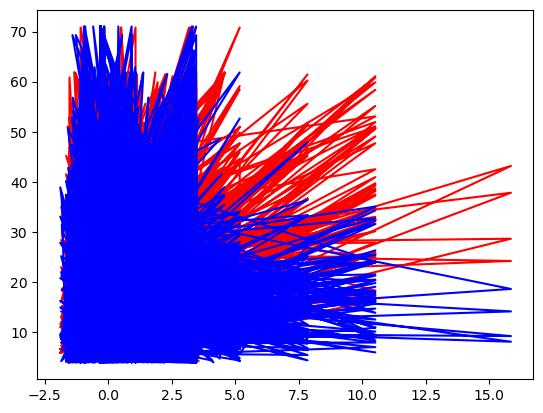

'"RESULTADOS: \nMAPE(treinamento): 0.10257749594649451\nMAPE (validação): 0.7497462149878487\nCONCLUSÃO: Há overfitting, visto que o erro da validação está muito maior que do treinamento. Considero que é devido\nlimitações computacionais da minha máquina, já que não é possível testar com outros hiperparâmetros que evitariam o Overffittin\n e diminuiriam o erro.'

In [73]:
#7)
#AVALIANDO MAPE DO EXERCÍCIO 5H:

print("MAPE (treinamento):", mape_train_h)
print("MAPE (validação):", mape_val_h)


X_train_7 = X_train_scaled_h.flatten()
X_val_7 = X_val_scaled_h.flatten()
y_train = y_train.flatten()
#y_pred_train_7 = y_pred_train_h.flatten()
#y_pred_val_7 = y_pred_val_h.flatten()
plt.plot(X_train_scaled_h, y_pred_train_h, c='r', label='PREDIÇÃO TREINO', marker=' ')
plt.plot(X_train_scaled_h, y_pred_val_h, c='b', label='PREDIÇÃO VALIDAÇÃO', marker=' ')
plt.show()

""""RESULTADOS: 
MAPE(treinamento): 0.10257749594649451
MAPE (validação): 0.7497462149878487
CONCLUSÃO: Há overfitting, visto que o erro da validação está muito maior que do treinamento. Considero que é devido
limitações computacionais da minha máquina, já que não é possível testar com outros hiperparâmetros que evitariam o Overffittin
 e diminuiriam o erro."""


In [ ]:
"""8) 
    Após a finalização de grande parte das análises propostas no trabalho 1 da disciplina concluo que os resultados poderiam 
ter sido melhores. 
    Alguns hiperparâmetros foram limitados devido falta de poder computacional principalmente nos casos de TRR,
Poly e Ridge, no entanto foi um trabalho extremamente proveitoso para meu aprendizado da disciplina e para enxergar 
os incontáveis gargalos das minhas habilidades em programação.
    O momento de maior aprendizado foi durante o exercício 5 em que percebi como é melhor fazer uma função ao invés de
reprogramar várias vezes códigos parecidos (percebi tarde demais) e ter que mudar grande parte das variáveis, o que me
tomou muito tempo e facilitou muito a ocorrência de erros, visto que é necessário refazer todas as variáveis para cada
questão, além de ter deixado o código sujo.
    Além de ter compreendido melhor os assuntos passados em sala também percebi as diversas possíveis fontes de exemplos e
ajudas que temos, como colegas, monitor, notebooks em aula e o chatgpt na geração de exemplos aplicando determinada função.
    Desde já ficaram ensinamentos para o trabalho 2, principalmente o de iniciar antes, pois levará mais tempo do que eu imagino."""

In [75]:
X_train_7.shape


(572000,)